In [1]:
import numpy as np
import time
import operator
import pandas as pd
import os
import matplotlib.pyplot as plt

In [38]:
A= np.array([(1,2),(4,6),(6,7),(7,4)])

In [39]:
#Step 1: Calculate Manhattan Distance
def distance(rowList):
    #Matrix to store the distances
    distance_array=np.zeros(shape=(len(rowList),len(rowList)))
    
    for i in range(0,len(rowList)):
        for j in range(0,i):
            distance_array[i][j]=sum(abs(x-y) for x,y in zip(rowList[i],rowList[j]))
            distance_array[j][i]=distance_array[i][j]
    return distance_array

In [40]:
k = distance(A)

In [41]:
k

array([[ 0.,  7., 10.,  8.],
       [ 7.,  0.,  3.,  5.],
       [10.,  3.,  0.,  4.],
       [ 8.,  5.,  4.,  0.]])

In [42]:
#Step2: Calculate kth distance < - for each datapoint find out distance for second closest neighbor
def k_distance(npArrayOfDist,k2):
    #List to store kth distances
    kidist=list()
    for i in range(0,len(npArrayOfDist)):
        d= sorted(npArrayOfDist[i])
        kidist.insert(i,d[k2])
    return kidist

In [43]:
l= k_distance(k,1) # 2 top nn<- for finding till second neighbor

In [44]:
l

[7.0, 3.0, 3.0, 4.0]

In [45]:
#Step3: k distnace Neighbourhood <- find all second closest neighbor for respective datapoint
def neighbour(npArrayOfDist,kdist):
    #Dictionary to store the neighbours
    neigh=dict()
    for i in range(0,len(npArrayOfDist)):
        neigh[i]=list()
        for j in range(0,len(npArrayOfDist)):
            if npArrayOfDist[i][j]<= kdist[i] and i!=j:
                neigh[i].append(j)
    return neigh

In [46]:
m = neighbour(k,l)

In [47]:
m

{0: [1], 1: [2], 2: [1], 3: [2]}

In [48]:
#Step4: Calculate Local Reachable Density
def local(npArrayOfDist,kdist,neigh):
    #List to hold the reachable distances. 
    reach_dist=list()
    #Dict to store the Local reachable density(LRD) values
    lrd=list()
    for i in range(0,len(npArrayOfDist)):
        values=0
        for j in neigh[i]:
            values+= max(kdist[j],npArrayOfDist[i][j])
            
        reach_dist.insert(i,values)    
        lrd.insert(i,len(neigh[i])/reach_dist[i])
    return reach_dist,lrd

In [49]:
n,o = local(k,l,m)

In [50]:
n

[7.0, 3.0, 3.0, 4.0]

In [51]:
o

[0.14285714285714285, 0.3333333333333333, 0.3333333333333333, 0.25]

In [52]:
#Step5: Calculate Local Outlier Factor
def local_outlier_factor(npArrayOfDist,neigh, reach_dist, lrd):
    #Dictionary to store the Local Outlier Factor values
    lof=dict()
    for i in range(0,len(npArrayOfDist)):
        lrd_values=0
        for j in neigh[i]:
            lrd_values+=lrd[j]
        
        lof[i]=lrd_values*reach_dist[i]
    return lof

In [53]:
p = local_outlier_factor(k,m,n,o)

In [54]:
p

{0: 2.333333333333333, 1: 1.0, 2: 1.0, 3: 1.3333333333333333}

In [55]:
#Step 6: Print the Outlier
def last_step(lof):
    sorted_lof = sorted(lof.items(), key=operator.itemgetter(1),reverse=True)
    return sorted_lof

In [56]:
z= last_step(p)

In [57]:
z

[(0, 2.333333333333333), (3, 1.3333333333333333), (1, 1.0), (2, 1.0)]

In [126]:
#Step7 Viz
def createOutlierList(dataframe,lof, topKOutlier):
    counter =0
    targetList =  []
    for j in lof:
        if counter < topKOutlier:
            dataframe.set_value(j[0], 'Target', 1)
        counter = counter +1
    return dataframe

In [120]:
df1 = pd.DataFrame(list(A))

In [121]:
df1

,0,1
0,1,2
1,4,6
2,6,7
3,7,4


In [122]:
#Add target to datafreme for viz
df1['Target'] = 0

In [123]:
df1

,0,1,Target
0,1,2,0
1,4,6,0
2,6,7,0
3,7,4,0


In [127]:
df1 = createOutlierList(df1,z,2)

C:\Users\praveen ji\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [128]:
df1

,0,1,Target
0,1,2,1
1,4,6,0
2,6,7,0
3,7,4,1


In [136]:
df1.columns = ['a', 'b','Target']

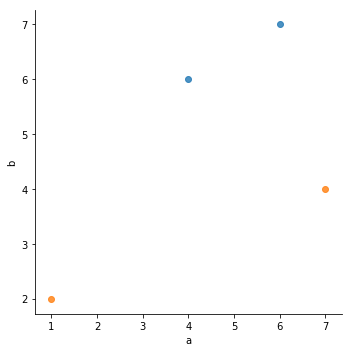

In [145]:
import seaborn as sns
sns.lmplot( x="a", y="b", data=df1, fit_reg=False, hue='Target', legend=False)